In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df1 = pd.read_csv(r'D:\Code Library\FIN3080\Assignment_2\A_share_stocks.csv')
df1['date'] = pd.to_datetime(df1.Trdmnt).dt.strftime('%Y-%m')
df1 = df1[['Stkcd','date','Mretwd']]
df1

,Stkcd,date,Mretwd
0,1,2019-07,0.025399
1,1,2019-08,0.002123
2,1,2019-09,0.100989
3,1,2019-10,0.042976
4,1,2019-11,-0.059656
...,...,...,...
91201,605500,2021-02,0.007151
91202,605500,2021-03,0.074823
91203,605500,2021-04,-0.051829
91204,605500,2021-05,0.001608


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91206 entries, 0 to 91205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stkcd   91206 non-null  int64  
 1   date    91206 non-null  object 
 2   Mretwd  90728 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [4]:
df2 = pd.read_csv(r'D:\Code Library\FIN3080\Assignment_2\regressor.csv')
df2['date'] = pd.to_datetime(df2.date).dt.strftime('%Y-%m')
df2 = df2.rename(columns = {'mean_shibor':'rf'})
df2 = df2.loc[(df2.date >= '2019-07') & (df2.date <= '2021-06'),['date','risk_pre','rf']].reset_index(drop = True) # 从第一题得到的数据中筛选第二题所需时间段数据
df2

,date,risk_pre,rf
0,2019-07,-0.002056,0.001759
1,2019-08,-0.010095,0.002148
2,2019-09,0.003627,0.002000
3,2019-10,0.011299,0.002059
4,2019-11,-0.014376,0.001833
5,2019-12,0.069896,0.001539
6,2020-01,-0.013896,0.001604
7,2020-02,-0.010005,0.001337
8,2020-03,-0.068216,0.001090
9,2020-04,0.060721,0.000840


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      24 non-null     object 
 1   risk_pre  24 non-null     float64
 2   rf        24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [6]:
df = pd.merge(df1, df2, how = 'outer', on = 'date')
df['Mretwd-rf'] = df['Mretwd'] - df['rf']
df = df.dropna() # drop缺失数据
df

,Stkcd,date,Mretwd,risk_pre,rf,Mretwd-rf
0,1,2019-07,0.025399,-0.002056,0.001759,0.023640
1,2,2019-07,0.034160,-0.002056,0.001759,0.032401
2,4,2019-07,-0.128181,-0.002056,0.001759,-0.129940
3,5,2019-07,-0.039474,-0.002056,0.001759,-0.041233
4,6,2019-07,-0.029358,-0.002056,0.001759,-0.031117
...,...,...,...,...,...,...
91201,605398,2021-06,-0.027153,-0.014681,0.001687,-0.028840
91202,605399,2021-06,0.296031,-0.014681,0.001687,0.294344
91203,605488,2021-06,-0.144551,-0.014681,0.001687,-0.146238
91204,605499,2021-06,2.110891,-0.014681,0.001687,2.109204


In [7]:
def model(df):
    y = df[['Mretwd-rf']]
    X = df[['risk_pre']]
    return np.squeeze(LinearRegression().fit(X,y).coef_) # 使用sklearn进行回归的函数

In [8]:
df_r = df.groupby(['Stkcd']).apply(model) # 分组回归
df_r = df_r.reset_index()
df_r = df_r.rename(columns = {0:'Beta'})
df_r['Beta'] = df_r['Beta'].astype(float)
df_r

,Stkcd,Beta
0,1,0.780209
1,2,0.767563
2,4,0.070348
3,5,0.276582
4,6,1.418283
...,...,...
4073,605398,0.130150
4074,605399,0.649490
4075,605488,0.000000
4076,605499,0.000000


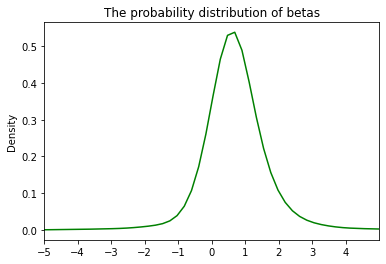

In [9]:
df_r.Beta.plot.density(color = 'g')
plt.title('The probability distribution of betas')
plt.xlim(-5,5)
plt.xticks(np.arange(-5,5,1))
plt.show()

In [10]:
perc = [0.1,0.25,0.75,0.9]
df_r.Beta.describe(percentiles = perc)

count    4078.000000
mean        0.681220
std         2.067015
min       -79.039432
10%        -0.150774
25%         0.270248
50%         0.649266
75%         1.073994
90%         1.648505
max        28.524083
Name: Beta, dtype: float64